# pytorch classifer sample
- 画像データ読み込み
- 理解
- 再現性

この記事が非常にわかりやすい
https://qiita.com/takurooo/items/e4c91c5d78059f92e76d

- pytorchの全体使用イメージ
    1. transforms
        - 画像に対する処理を担当。最小単位
    2. Dataset
        - 画像とラベルを1組ずつ返す
    3. Dataloader
        - バッチ数分返す

In [1]:
import torch
import torchvision
import torch.nn as nn
from tqdm.notebook import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torch.utils.data import random_split
import torchvision.transforms as transforms
%matplotlib inline

In [2]:
labels = {
    0: "buildings",
    1: "forest",
    2: "glacier",
    3: "mountain",
    4: "sea",
    5: "street"
}

In [3]:

'''
def encode_label(label):
    target = torch.zeros(6)
    for l in str(label).split(" "):
        target[int(l)] = 1.
    return target
    
def decode_target(target, text_labels=False, threshold=0.5):
    result = []
    for i, x in enumerate(target):
        if (x >=threshold):
            if text_labels:
                result.append(labels[i] + "(" + str(i) + ")")
            else:
                result.append(str(i))
    return " ".join(result)
'''

'\ndef encode_label(label):\n    target = torch.zeros(6)\n    for l in str(label).split(" "):\n        target[int(l)] = 1.\n    return target\n    \ndef decode_target(target, text_labels=False, threshold=0.5):\n    result = []\n    for i, x in enumerate(target):\n        if (x >=threshold):\n            if text_labels:\n                result.append(labels[i] + "(" + str(i) + ")")\n            else:\n                result.append(str(i))\n    return " ".join(result)\n'

In [4]:
transform_ds= transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    #transforms.Normalize((.5, .5, .5), (.5, .5, .5))
])

transform_dt= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([.5, .5, .5], [.5, .5, .5])
])

ds = torchvision.datasets.ImageFolder(root= "./seg_data/seg_train/seg_train", 
                                      transform=transform_ds)

test_ds = torchvision.datasets.ImageFolder(root= "./seg_data/seg_test/seg_test", 
                                           transform=transform_dt)

torchvision.datasets.ImageFolderはkerasのfrom_from_directryにあたり、自動でラベリングをしてくれる

## torchvision.datasets.ImageFolderを使わず自作でDataloaderを作ってみる

こちらを参照
https://qiita.com/sheep96/items/0c2c8216d566f58882aa

In [16]:
# csvfileが用意されている例
class MyDataset(Dataset):

    def __init__(self, csv_file_path, root_dir, transform=None):
        #pandasでcsvデータの読み出し
        self.image_dataframe = pd.read_csv(csv_file_path)
        self.root_dir = root_dir
        #画像データへの処理
        self.transform = transform

    def __len__(self):
        return len(self.image_dataframe)

    def __getitem__(self, idx):
        #dataframeから画像へのパスとラベルを読み出す
        label = self.image_dataframe.iat[idx, LABEL_IDX]
        img_name = os.path.join(self.root_dir, 'classification-of-handwritten-letters',
                'letters2', self.image_dataframe.iat[idx, IMG_IDX])
        #画像の読み込み
        image = io.imread(img_name)
        #画像へ処理を加える
        if self.transform:
            image = self.transform(image)

        return image, label

SyntaxError: invalid syntax (<ipython-input-16-33d219efdf44>, line 3)

In [5]:
train_ds_size = 12631
val_ds_size = 1403
train_ds, val_ds = random_split(ds, [train_ds_size, val_ds_size])


In [6]:
batch_size = 128
train_dl = DataLoader(ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=3, pin_memory=True)

In [9]:
def show_batch(train_dl):
    for images, labels in train_dl:
        fig, ax = plt.subplots(figsize=(12,12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1,2,0))
        break

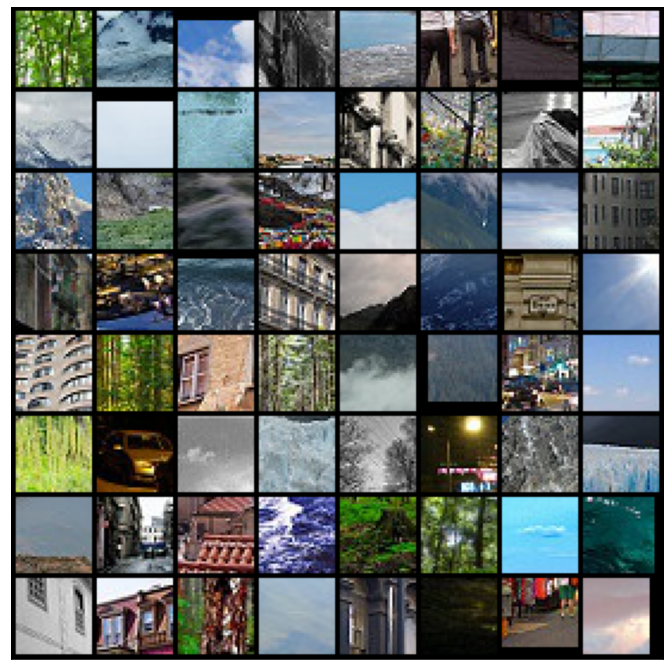

In [12]:
show_batch(train_dl)